## First project: Apple Quality Dataset

### 1. First Inspection & Data Cleaning

In [1]:
# import all the libraries needed
import pandas as pd
import numpy as np # read numerial value or array
import matplotlib.pyplot as plt # create basic level of graph
import seaborn as sns # for graph

from scipy.stats import ttest_ind # for t-test
import scipy.stats as stats # confidence interval
from scipy.stats import f_oneway # ANOVA
from scipy.stats import chi2_contingency # Chi-square
import statsmodels.api as sm # regression
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import my data
path = "C:/Users/wangy/Downloads/archive/apple_quality.csv"
apple = pd.read_csv(path)

# get basic information
apple.info()
apple.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


We have a total of 9 columns. The first 7 columns(e.g. A_id, size) represent numberical values. The last 2 columns contain objects instead of numbers.

The problem is that ideally there should be 4001 values in every column but only column "Acidity" has no null value. In this case, I should check whether there is one row or entry that contains 8 null values(I can know this by using apple.tail() because of luck so I need standard operations to check the dataset). If so, it is better to drop it so we have 4000 full records of apples.

In [3]:
# find the null values
apple[apple.isnull().any(axis=1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Okay, looks like all the null values are in row 4000(the last row). Then we can drop this row.

In [4]:
# drop the row with null values 
# we want to update the current data frame instead of creating anew one so we use "inplace = True"
apple.dropna(inplace = True)
# check the updated data
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


But wait! Acidity should also have numerical values like the columns before it. We should change the data type when necessary.

In [5]:
apple['Acidity'] = apple['Acidity'].astype('float64')
apple.info()
apple.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


Now we can procced and check the values  in every column.

### 2. Descriptive Statistics

In [6]:
# first we can check all the numerical columns
# statistical report
apple.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [7]:
# measure of central tendency   # we will only look at columns with numerical values and the id column is meaningless
print('\nMean: ')
print(apple.iloc[:, 1:8].mean())

print('\nMedian: ')
print(apple.iloc[:, 1:8].median())

print('\nMode: ')
print(apple.iloc[:, 1:8].mode())


Mean: 
Size          -0.503015
Weight        -0.989547
Sweetness     -0.470479
Crunchiness    0.985478
Juiciness      0.512118
Ripeness       0.498277
Acidity        0.076877
dtype: float64

Median: 
Size          -0.513703
Weight        -0.984736
Sweetness     -0.504758
Crunchiness    0.998249
Juiciness      0.534219
Ripeness       0.503445
Acidity        0.022609
dtype: float64

Mode: 
          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -7.151703 -7.149848  -6.894485    -6.055058  -5.961897 -5.864599   
1    -6.905803 -6.581590  -6.507847    -4.495359  -5.814308 -5.611400   
2    -6.713315 -6.556685  -6.359749    -4.241316  -5.801766 -5.313838   
3    -6.710169 -6.428075  -5.958315    -4.087563  -5.743512 -5.199663   
4    -6.690121 -6.235107  -5.893007    -3.850312  -5.713431 -4.851519   
...        ...       ...        ...          ...        ...       ...   
3995  5.225383  4.369571   5.559624     6.297873   6.328304  6.102587   
3996  5.403276  4.738227

The mode values looks "chaotic" because all the values are unique so we cannot find the mode values (most frequently appeared)

According to the data source, all these values have been standardised. So we are seeing negative values. It appears that, "Size", "Weight" and "Sweetness" have negative means and medians while "Crunchiness", "Juiciness", "Ripeness" and "Acidity" have positive means and medians.

In [8]:
# measure of dispersion
print('\nVariance: ')
print(apple.iloc[:, 1:8].var())

print('\nStandard Deviation: ') # square root of varience
print(apple.iloc[:, 1:8].std())


Variance: 
Size           3.717410
Weight         2.568029
Sweetness      3.776962
Crunchiness    1.967728
Juiciness      3.726003
Ripeness       3.513476
Acidity        4.453238
dtype: float64

Standard Deviation: 
Size           1.928059
Weight         1.602507
Sweetness      1.943441
Crunchiness    1.402757
Juiciness      1.930286
Ripeness       1.874427
Acidity        2.110270
dtype: float64


In [9]:
# skewness & kurtosis

print('\nSkewness: ') # distriution of data points
# right skew-positive    mean>median>mode
# left skew-negative     mean<median<mode
print(apple.iloc[:, 1:8].skew())

print('\nKurtosis: ')
print(apple.iloc[:, 1:8].kurt())


Skewness: 
Size          -0.002437
Weight         0.003102
Sweetness      0.083850
Crunchiness    0.000230
Juiciness     -0.113421
Ripeness      -0.008764
Acidity        0.055783
dtype: float64

Kurtosis: 
Size          -0.083341
Weight         0.359050
Sweetness      0.014472
Crunchiness    0.722020
Juiciness      0.028735
Ripeness      -0.071850
Acidity       -0.093451
dtype: float64


"Weight", "Sweetness", "Crunchiness" and "Acidity" are all right skewed which means they have more values on the right side of the distribution(a greater tail on the right). But this shape might not be very obvious due to the small value in Skewness. "Size", "Juiciness" and "Ripeness" are both left skewed so they have a greater tail of the left.

The Kurtosis values are all small. The Kurtosis values of "Weight", "Sweetness", "Crunchiness" and "Juiciness" are positive which suggests their distribution should have a sharper peak than normal distribution while the distribution of "Size", "Ripeness" and "Acidity" should have a flatter peak compared with normal distribution.

Having positive values in Kurtisis also suggests higher chance of having more outliers than normal distribution but since the valuea are small, the differences could be scarce.

In [10]:
# now we look at "Quality"
apple.Quality.value_counts(normalize = True)

Quality
good    0.501
bad     0.499
Name: proportion, dtype: float64

About the same number of good and bad apples.

### Visualization

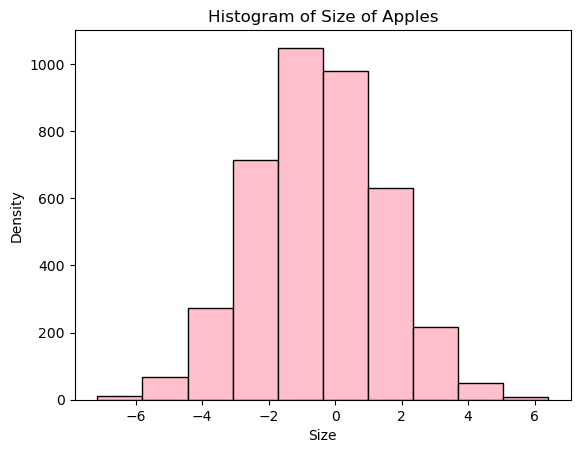

In [48]:
# Size
plt.hist(apple['Size'], bins= 10, color='pink',edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Density')
plt.title('Histogram of Size of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Size of Apples')

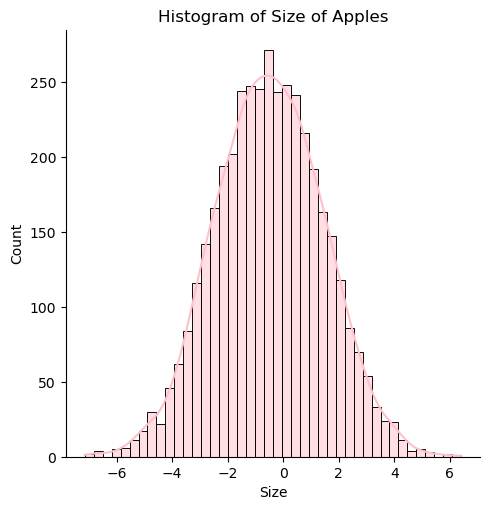

In [12]:
sns.displot(data=apple,x='Size',kde=True,color='pink')
plt.title('Histogram of Size of Apples')

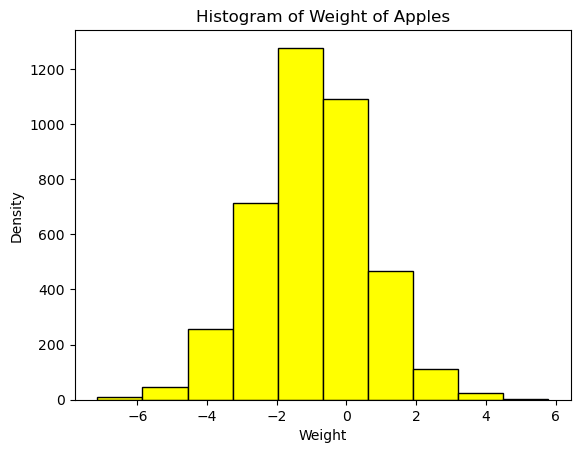

In [13]:
# Weight
plt.hist(apple['Weight'], bins= 10, color='yellow',edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Histogram of Weight of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Weight of Apples')

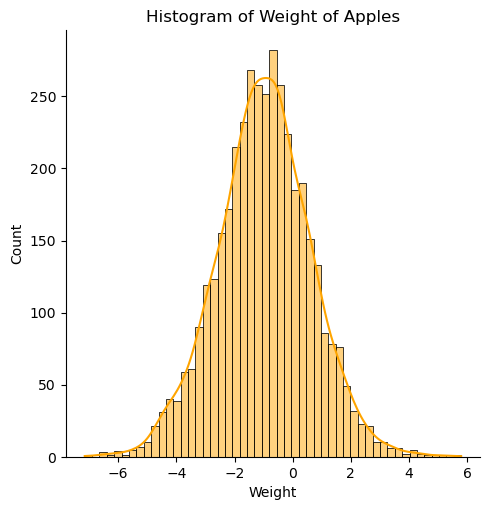

In [14]:
sns.displot(data=apple,x='Weight',kde=True,color='orange')
plt.title('Histogram of Weight of Apples')

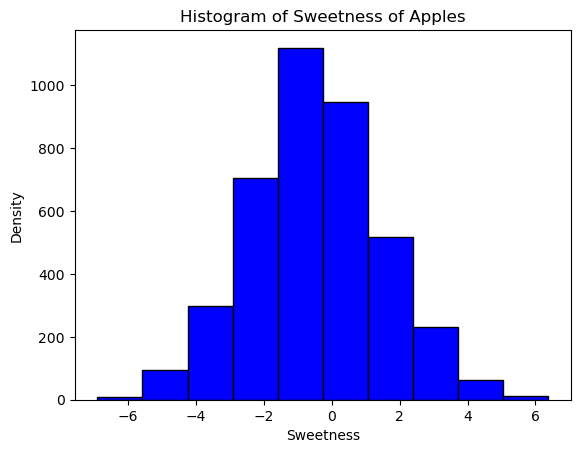

In [15]:
# Sweetness
plt.hist(apple['Sweetness'], bins= 10, color='blue',edgecolor='black')
plt.xlabel('Sweetness')
plt.ylabel('Density')
plt.title('Histogram of Sweetness of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Sweetness of Apples')

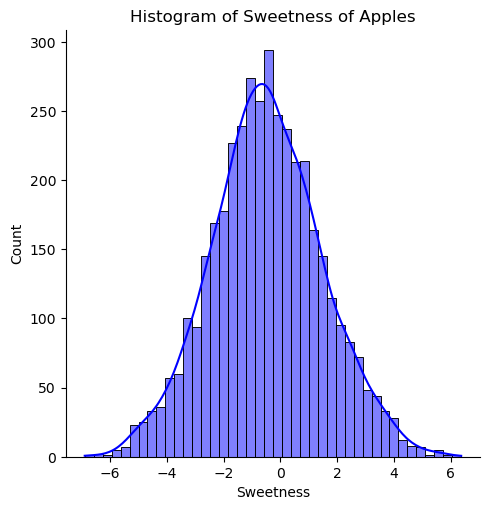

In [16]:
sns.displot(data=apple,x='Sweetness',kde=True,color='blue')
plt.title('Histogram of Sweetness of Apples')

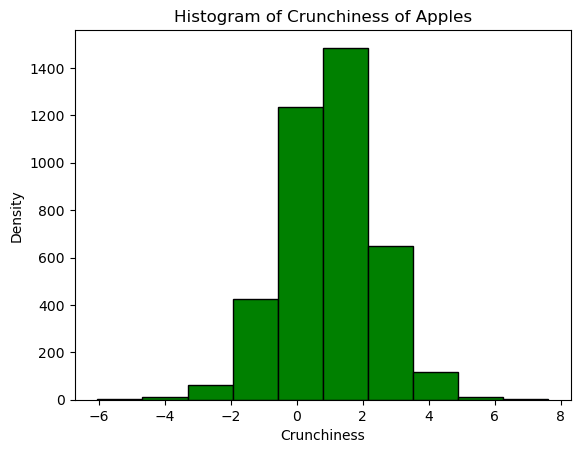

In [17]:
# Crunchiness
plt.hist(apple['Crunchiness'], bins= 10, color='green',edgecolor='black')
plt.xlabel('Crunchiness')
plt.ylabel('Density')
plt.title('Histogram of Crunchiness of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Crunchiness of Apples')

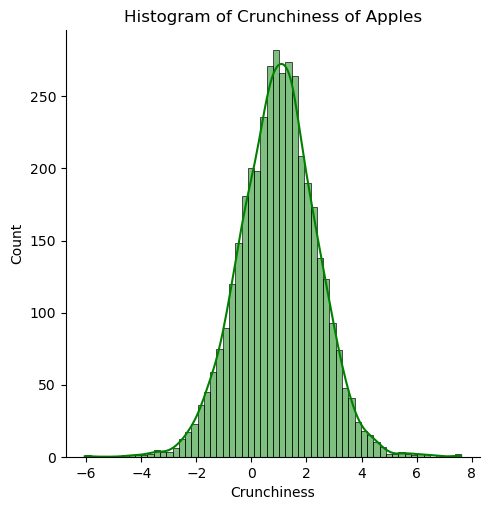

In [18]:
sns.displot(data=apple,x='Crunchiness',kde=True,color='green')
plt.title('Histogram of Crunchiness of Apples')

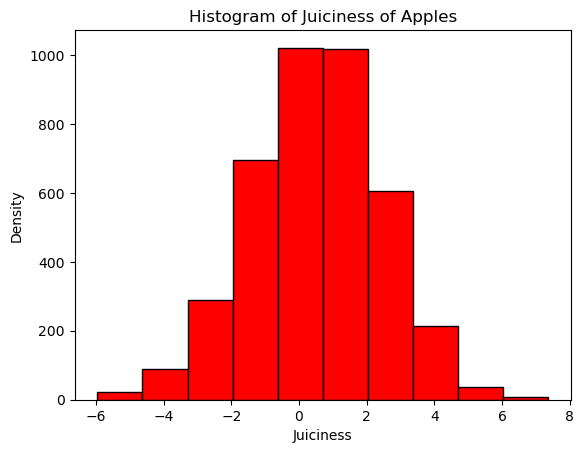

In [19]:
# Juiciness
plt.hist(apple['Juiciness'], bins= 10, color='red',edgecolor='black')
plt.xlabel('Juiciness')
plt.ylabel('Density')
plt.title('Histogram of Juiciness of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Juiciness of Apples')

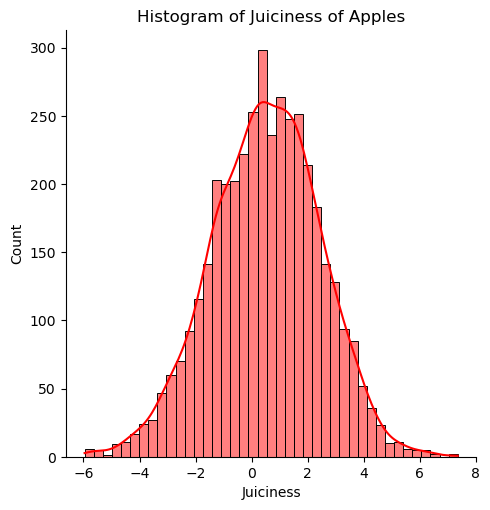

In [20]:
sns.displot(data=apple,x='Juiciness',kde=True,color='red')
plt.title('Histogram of Juiciness of Apples')

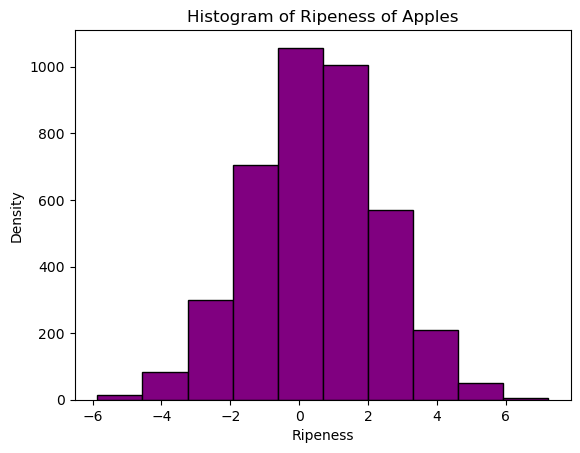

In [21]:
# Ripeness
plt.hist(apple['Ripeness'], bins= 10, color='purple', edgecolor='black')
plt.xlabel('Ripeness')
plt.ylabel('Density')
plt.title('Histogram of Ripeness of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Ripeness of Apples')

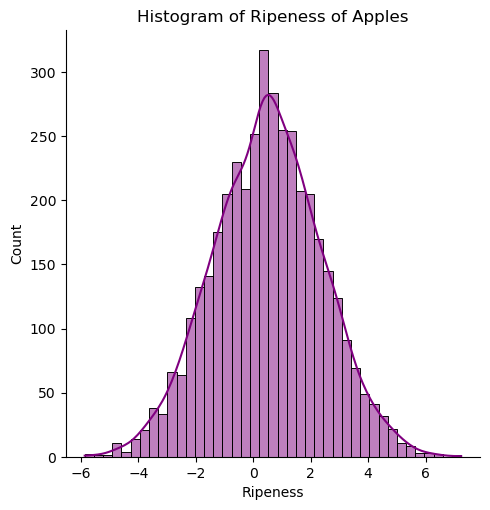

In [23]:
sns.displot(data=apple,x='Ripeness',kde=True,color='purple')
plt.title('Histogram of Ripeness of Apples')

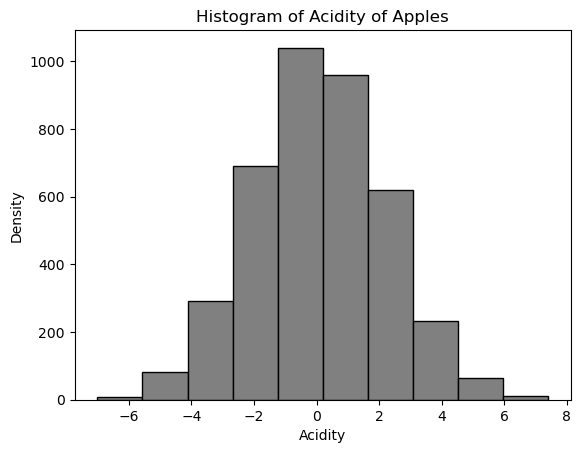

In [24]:
# Acidity
plt.hist(apple['Acidity'], bins= 10, color='grey', edgecolor='black')
plt.xlabel('Acidity')
plt.ylabel('Density')
plt.title('Histogram of Acidity of Apples')
plt.show()

Text(0.5, 1.0, 'Histogram of Acidity of Apples')

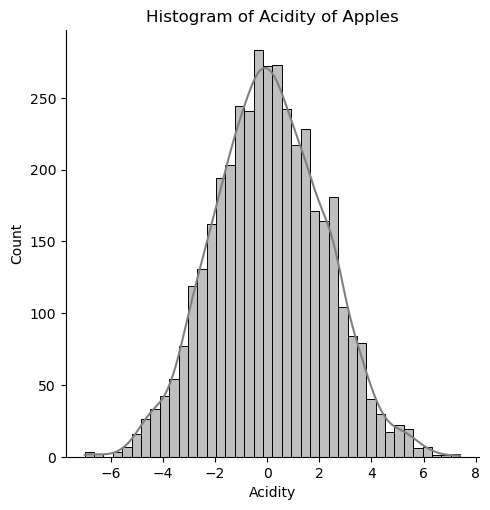

In [25]:
sns.displot(data=apple,x='Acidity',kde=True,color='grey')
plt.title('Histogram of Acidity of Apples')

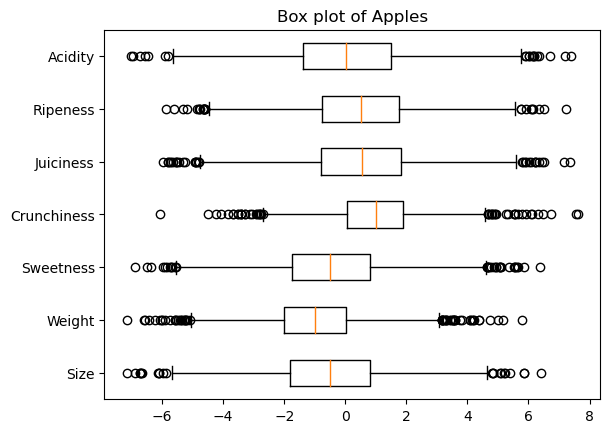

In [26]:
plt.boxplot(apple.iloc[:, 1:8],vert=False)

# title to the plot
plt.title("Box plot of Apples")

# make the y-axis show column names
plt.yticks(ticks=range(1, len(apple.columns[1:8]) + 1), labels=apple.columns[1:8])
plt.show()

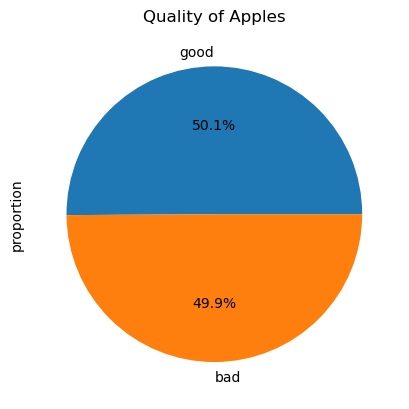

In [27]:
# pie chart for "quality"
apple.Quality.value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.title("Quality of Apples")
plt.show()

### Inferential Statistics

#### T-tests

Q1: Are the size of good apples different from those of bad apples?

In [28]:
good_apple_size = apple[apple['Quality'] == 'good']['Size']
bad_apple_size = apple[apple['Quality'] == 'bad']['Size']

#ttest
t_stats, p_value = ttest_ind(good_apple_size, bad_apple_size)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

# greater T: greater difference between two sample
# ideally when p < 0.05 we can reject the null hypothesis

T_Statistics:15.90939700060386, P_value:2.6282469018256428e-55


We reject the null hypothesis. There is significant(p<0.05) difference between the mean value of the size of two samples.

Q2: Are the weight of good apples different from those of bad apples?

In [29]:
good_apple_weight = apple[apple['Quality'] == 'good']['Weight']
bad_apple_weight = apple[apple['Quality'] == 'bad']['Weight']

#ttest
t_stats, p_value = ttest_ind(good_apple_weight, bad_apple_weight)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

T_Statistics:0.08984533096069469, P_value:0.9284146254017562


We cannot reject the null hypothesis. There is no significant(p>0.05) difference between the mean value of the weight of two samples.

Q3: Are the sweetness of good apples different from those of bad apples?

In [30]:
good_apple_sweet = apple[apple['Quality'] == 'good']['Sweetness']
bad_apple_sweet = apple[apple['Quality'] == 'bad']['Sweetness']

#ttest
t_stats, p_value = ttest_ind(good_apple_sweet, bad_apple_sweet)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

T_Statistics:16.39542605290574, P_value:1.6104707964937464e-58


We reject the null hypothesis. There is significant(p<0.05) difference between the mean value of the sweetness of two samples.

Q4 : Are the Crunchiness of good apples different from those of bad apples?

In [31]:
good_apple_c = apple[apple['Quality'] == 'good']['Crunchiness']
bad_apple_c = apple[apple['Quality'] == 'bad']['Crunchiness']

#ttest
t_stats, p_value = ttest_ind(good_apple_c, bad_apple_c)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

T_Statistics:-0.782603720834302, P_value:0.43390620608381925


We cannot reject the null hypothesis. There is no significant(p>0.05) difference between the mean value of the crunchiness of two samples.

Q5: Are the juiciness of good apples different from those of bad apples?

In [32]:
good_apple_jui = apple[apple['Quality'] == 'good']['Juiciness']
bad_apple_jui = apple[apple['Quality'] == 'bad']['Juiciness']

#ttest
t_stats, p_value = ttest_ind(good_apple_jui, bad_apple_jui)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

T_Statistics:17.040885057341487, P_value:6.475737342968475e-63


We reject the null hypothesis. There is significant(p<0.05) difference between the mean value of the juiciness of two samples.

Q6: Are the ripeness of good apples different from those of bad apples?

In [33]:
good_apple_r = apple[apple['Quality'] == 'good']['Ripeness']
bad_apple_r = apple[apple['Quality'] == 'bad']['Ripeness']

#ttest
t_stats, p_value = ttest_ind(good_apple_r, bad_apple_r)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

T_Statistics:-17.328836174786705, P_value:6.358168568021456e-65


We reject the null hypothesis. There is significant(p<0.05) difference between the mean value of the ripeness of two samples.

Q7: Are the Acidity of good apples different from those of bad apples?

In [34]:
good_apple_acid = apple[apple['Quality'] == 'good']['Acidity']
bad_apple_acid = apple[apple['Quality'] == 'bad']['Acidity']

#ttest
t_stats, p_value = ttest_ind(good_apple_acid, bad_apple_acid)
print(f'T_Statistics:{t_stats}, P_value:{p_value}')

T_Statistics:-0.48671268419574665, P_value:0.6264886350399594


We cannot reject the null hypothesis. There is no significant(p>0.05) difference between the mean value of the acidity of two samples.

In [35]:
print('\nMean of good apples: ')
print(apple[apple['Quality'] == 'good'].iloc[:, 1:8].mean())

print('\nMean of bad apples: ')
print(apple[apple['Quality'] == 'bad'].iloc[:, 1:8].mean())


Mean of good apples: 
Size          -0.033553
Weight        -0.987274
Sweetness      0.016287
Crunchiness    0.968154
Juiciness      1.013356
Ripeness       0.003890
Acidity        0.060668
dtype: float64

Mean of bad apples: 
Size          -0.974358
Weight        -0.991828
Sweetness     -0.959195
Crunchiness    1.002871
Juiciness      0.008871
Ripeness       0.994646
Acidity        0.093151
dtype: float64


#### Confidence Interval

In [36]:
# size
# calculate mean and standard error
mean_score = np.mean(apple[apple['Quality'] == 'good']['Size'])
std_error = stats.sem(apple[apple['Quality'] == 'good']['Size'])

# calculate 95% confidence interval
conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'good']['Size'])-1, loc = mean_score, scale = std_error)
print(conf_int)

mean_score = np.mean(apple[apple['Quality'] == 'bad']['Size'])
std_error = stats.sem(apple[apple['Quality'] == 'bad']['Size'])

conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'bad']['Size'])-1, loc = mean_score, scale = std_error)
print(conf_int)

(-0.1199524475040735, 0.05284615989529106)
(-1.0516806615986412, -0.8970347884244048)


In [37]:
# sweetness
# calculate mean and standard error
mean_score = np.mean(apple[apple['Quality'] == 'good']['Sweetness'])
std_error = stats.sem(apple[apple['Quality'] == 'good']['Sweetness'])

# calculate 95% confidence interval
conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'good']['Sweetness'])-1, loc = mean_score, scale = std_error)
print(conf_int)

mean_score = np.mean(apple[apple['Quality'] == 'bad']['Sweetness'])
std_error = stats.sem(apple[apple['Quality'] == 'bad']['Sweetness'])

conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'bad']['Sweetness'])-1, loc = mean_score, scale = std_error)
print(conf_int)

(-0.06739609396309018, 0.09996930560680276)
(-1.0404991732291335, -0.8778900424221692)


In [38]:
# juiciness
# calculate mean and standard error
mean_score = np.mean(apple[apple['Quality'] == 'good']['Juiciness'])
std_error = stats.sem(apple[apple['Quality'] == 'good']['Juiciness'])

# calculate 95% confidence interval
conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'good']['Juiciness'])-1, loc = mean_score, scale = std_error)
print(conf_int)

mean_score = np.mean(apple[apple['Quality'] == 'bad']['Juiciness'])
std_error = stats.sem(apple[apple['Quality'] == 'bad']['Juiciness'])

conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'bad']['Juiciness'])-1, loc = mean_score, scale = std_error)
print(conf_int)

(0.9393395691695204, 1.0873715267197013)
(-0.07998138952982886, 0.09772423110497916)


In [39]:
# ripeness
# calculate mean and standard error
mean_score = np.mean(apple[apple['Quality'] == 'good']['Ripeness'])
std_error = stats.sem(apple[apple['Quality'] == 'good']['Ripeness'])

# calculate 95% confidence interval
conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'good']['Ripeness'])-1, loc = mean_score, scale = std_error)
print(conf_int)

mean_score = np.mean(apple[apple['Quality'] == 'bad']['Ripeness'])
std_error = stats.sem(apple[apple['Quality'] == 'bad']['Ripeness'])

conf_int = stats.t.interval(0.95, len(apple[apple['Quality'] == 'bad']['Ripeness'])-1, loc = mean_score, scale = std_error)
print(conf_int)

(-0.07188625824651328, 0.0796667382824414)
(0.911974762651299, 1.0773174929859757)


Good apples are different from bad apples in terms of size, sweetness, juiciness and ripeness. Good apples are bigger, sweeter, juicier and less ripe.

#### ANOVA

In [40]:
# 3 or more than 3 samples - anova test
sweetness = apple[apple['Quality'] == 'good']['Sweetness']
juiciness = apple[apple['Quality'] == 'good']['Juiciness']
ripeness = apple[apple['Quality'] == 'good']['Ripeness']

# ANOVA test
f_stats, p_value = f_oneway(sweetness, juiciness, ripeness)
print(f'F_Statistics:{f_stats}, P_value:{p_value}')

F_Statistics:212.46067966519905, P_value:7.011907955336518e-90


Great f statistics and p < 0.05. Significant differences between the mean of Sweetness, Juiciness and Ripeness.

#### Chi-Square

In [41]:
# We only have one column with categorical values
# To finish this task, a new column can be created
apple['Simple_size'] = np.where(apple['Size'] >= -0.5, 'big', 'small')
apple.Simple_size.value_counts(normalize = True)

Simple_size
small    0.50275
big      0.49725
Name: proportion, dtype: float64

In [42]:
# create a crosstab/contigency table
ct = pd.crosstab(apple['Quality'], apple['Simple_size'])

# chi-square test
chi, p_value, dof, ex = chi2_contingency(ct)
print(f'Chi_Square:{chi}, P_value:{p_value}')

Chi_Square:173.08023246101902, P_value:1.571981484137978e-39


P < 0.05. Quality is associated with size(big/small).

### Correlations and Relationships

In [43]:
correlation = apple['Size'].corr(apple['Weight'])
print(f"Correlation coefficient between Size and Weight: {correlation}")

Correlation coefficient between Size and Weight: -0.17070165787391348


Interesting. Size and Weight have negative correlation. When size increases, weight decreases. But since the value is very close to 0, the correlation is very weak.

In [44]:
correlation = apple['Sweetness'].corr(apple['Juiciness'])
print(f"Correlation coefficient between Sweetness and Juiciness: {correlation}")

Correlation coefficient between Sweetness and Juiciness: 0.09588152817253587


Still, a very weak positive correlation.

In [50]:
# Encode the categorical target variable
apple['Quality_encoded'] = apple['Quality'].astype('category').cat.codes

apple.Quality_encoded.value_counts(normalize = True)  # okay, now "good" becomes 1.

Quality_encoded
1    0.501
0    0.499
Name: proportion, dtype: float64

In [51]:
# Fit the logistic regression model
# Note: Formula for logistic regression should use "C(Quality_encoded)" to specify it's a categorical variable
model = smf.logit("Quality_encoded ~ Size + Sweetness + Juiciness + Ripeness", data=apple).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.549771
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Quality_encoded   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3995
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:                  0.2068
Time:                        12:08:45   Log-Likelihood:                -2199.1
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                4.933e-247
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3491      0.042      8.349      0.000       0.267       0.431
Size           0.4718      0.

In [46]:
model = smf.logit("Quality_encoded ~ Size + Weight + Sweetness + Crunchiness+ Juiciness + Ripeness + Acidity", data=apple).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.514195
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Quality_encoded   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                            7
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:                  0.2582
Time:                        10:47:40   Log-Likelihood:                -2056.8
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                5.599e-305
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6462      0.061     10.514      0.000       0.526       0.767
Size            0.6495    